In [1]:
%matplotlib notebook
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

import notebook_style
labels = notebook_style.labels

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1D-heterogenous-Heat-transfer-(explicit-solution)" data-toc-modified-id="1D-heterogenous-Heat-transfer-(explicit-solution)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>1D heterogenous Heat transfer (explicit solution)</a></span><ul class="toc-item"><li><span><a href="#Compare-averaging-methods-to-calculate-thermal-diffusivity-at-intermediate-points-$\alpha_{i+\frac{1}{2}}-=-f(\alpha_i,-\alpha_{i+1})$" data-toc-modified-id="Compare-averaging-methods-to-calculate-thermal-diffusivity-at-intermediate-points-$\alpha_{i+\frac{1}{2}}-=-f(\alpha_i,-\alpha_{i+1})$-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Compare averaging methods to calculate thermal diffusivity at intermediate points $\alpha_{i+\frac{1}{2}} = f(\alpha_i, \alpha_{i+1})$</a></span></li></ul></li></ul></div>

# 1D heterogenous Heat transfer (explicit solution) 

_notebook by Nico Liebers (nico.liebers@dlr.de), Deutsches Zentrum für Luft- und Raumfahrt (DLR), 2020_

    Code under MIT license, all other material under CC-BY-3.0 license

In the previous lesson we derived the finite difference solution for the 1D homogeneous case of the heat transfer equation:

$$
\frac{\partial T}{\partial t} = \alpha_x \frac{\partial^2 T}{\partial x^2} + s
$$

In the case of heterogeneous thermal diffusivity $\alpha$ it has to be included into the spatial derivative:

$$
\frac{\partial T}{\partial t} = \frac{\partial}{\partial x} 
\left( \alpha_x \frac{\partial T}{\partial x} \right) + s
$$

We introduce the heat flux $q$ as follows:

$$
q = \alpha_x \frac{\partial T}{\partial x} 
$$

$$
\frac{\partial T}{\partial t} = \frac{\partial q}{\partial x} + s
$$

Which is defined at the intermediate points:

$$
\begin{matrix}
\bullet & \circ  & \bullet & \circ &\bullet   \\
T_{i-1} & q_{i-\frac{1}{2}} & T_{i} & q_{i+\frac{1}{2}} & T_{i+1}
\end{matrix}
$$

$$
q_{i-\frac{1}{2}} = \bar \alpha_{i-\frac{1}{2}} \frac{T_i - T_{i-1}}{\Delta x}
$$
$$
q_{i+\frac{1}{2}} = \bar \alpha_{i+\frac{1}{2}} \frac{T_{i+1} - T_i}{\Delta x}
$$

Resulting in the finite difference scheme:

\begin{align}
\frac{T^{n+1}_{i} - T^n_{i}}{\triangle t} &= \frac{q^n_{i+\frac{1}{2}} - q^n_{i-\frac{1}{2}}}{\triangle x} + s^n_{i} \\
&= \frac{1}{\triangle x^2} \left( \bar \alpha_{i+\frac{1}{2}} \left( T^n_{i+1} - T^n_i \right) -   \bar \alpha_{i-\frac{1}{2}} \left(T^n_{i} - T^n_{i-1} \right) \right) + s^n_{i}
\end{align}

Hence we need to calculate $\alpha$ at these points. 

$$
\begin{matrix}
\bullet & \circ  & \bullet & \circ &\bullet   \\
T_{i-1} & \bar \alpha_{i-\frac{1}{2}} & T_{i} & \bar \alpha_{i+\frac{1}{2}} & T_{i+1}
\end{matrix}
$$

We can use the arithmetic average:
$$
\bar \alpha_{i + \frac{1}{2}} = \frac{\alpha_{i} + \alpha_{i+1}}{2}
$$

Resulting in:

\begin{align}
\frac{T^{n+1}_{i} - T^n_{i}}{\triangle t} 
= \frac{1}{\triangle x^2} \left( \frac{\alpha_{i} + \alpha_{i+1}}{2} \left( T^n_{i+1} - T^n_i \right) - \frac{\alpha_{i-1} + \alpha_{i}}{2} \left(T^n_{i} - T^n_{i-1} \right) \right) + s^n_{i}
\end{align}

Or the harmonic average:
$$
\frac{2}{\bar \alpha_{i+\frac{1}{2}}} = \frac{1}{\alpha_{i}} + \frac{1}{\alpha_{i+1}}
$$

$$
\bar \alpha_{i+\frac{1}{2}} = \frac{2 \cdot
\alpha_{i} \cdot \alpha_{i+1}}
{\alpha_{i} + \alpha_{i+1} } 
$$

## Compare averaging methods to calculate thermal diffusivity at intermediate points $\alpha_{i+\frac{1}{2}} = f(\alpha_i, \alpha_{i+1})$

Let's compare these two averaging methods for a heterogeneous case. We also have a look what results delivers the finite difference scheme from the previous lesson (homogenous thermal diffusivity). 

limit for numerical stability: dt = 0.019999999999999997 s
used time step: dt = 0.009999999999999998 s


<IPython.core.display.Javascript object>


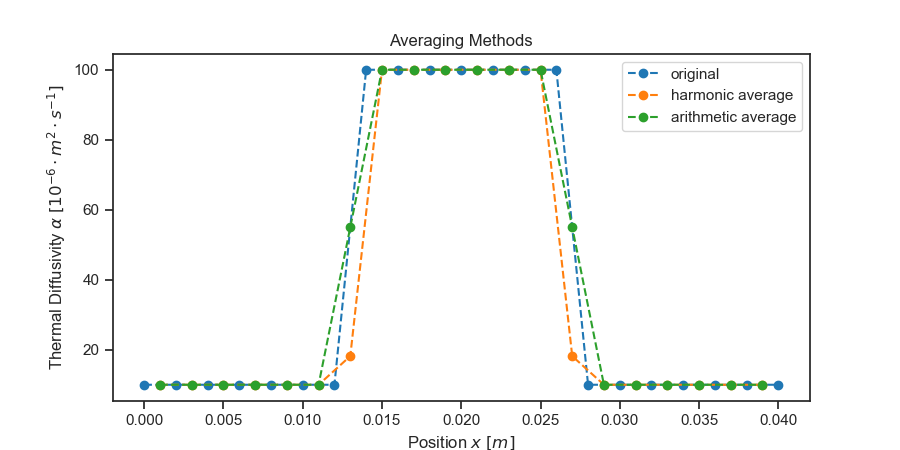

In [2]:
d = 40 / 1000
Nx = 21
dx = d / (Nx - 1)
x = np.arange(Nx) * dx


alpha = np.ones(Nx)*1e-5
alpha[Nx//3:-Nx//3] *= 10


dt_CFL = dx**2 / 2 / np.max(alpha)
print("limit for numerical stability: dt =", dt_CFL, "s")
dt = dt_CFL / 2
print("used time step: dt =", dt, "s")

# harmonic average
alpha_harmonic = 2*(alpha[1:]*alpha[:-1])/(alpha[1:]+alpha[:-1])
# arithmetic average
alpha_arithmetic = (alpha[1:]+alpha[:-1]) / 2

T = np.zeros(Nx)
T[0] = 100

plt.figure()
plt.title('Averaging Methods')
plt.plot(x, alpha*1e6, "o--", label="original")
plt.plot(x[:-1] + dx/2, alpha_harmonic*1e6, "o--", label="harmonic average")
plt.plot(x[:-1] + dx/2, alpha_arithmetic*1e6, "o--", label="arithmetic average")
plt.legend()
plt.ylabel(r'Thermal Diffusivity $\alpha \; [10^{-6} \cdot m^2 \cdot s^{-1}]$')
plt.xlabel(r'Position $x \; [m]$')
plt.gcf().canvas.draw()

<IPython.core.display.Javascript object>


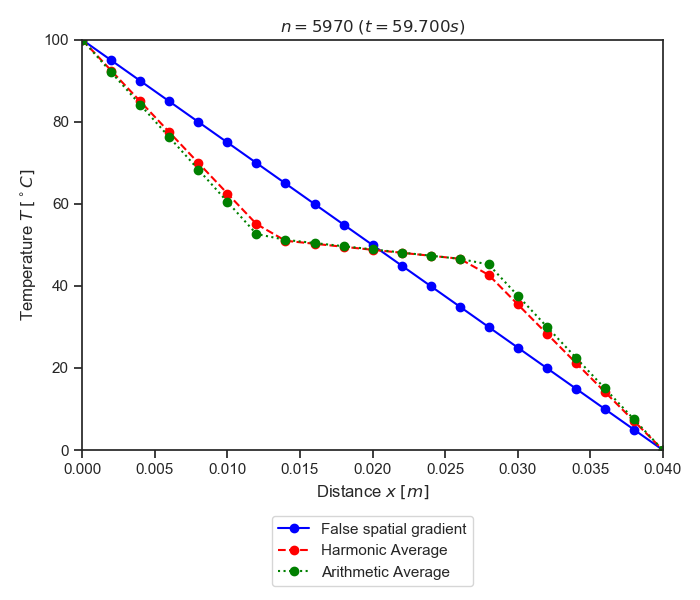

In [3]:
noflux_right = False

# number of time steps to compute
nt = 6000
# update plots after how many iterations
N_snap = 200
i_snap = nt // N_snap

sigma_orig = alpha * dt / dx**2
sigma_harmonic = alpha_harmonic * dt / dx**2
sigma_arithmetic = alpha_arithmetic * dt / dx**2

T1 = np.copy(T)
T2 = np.copy(T)
T3 = np.copy(T)

fig, ax = plt.subplots(1, 1, figsize=(7.0, 6.0))
plt.ion()
for i in range(nt):    
    T1[1:-1] += sigma_orig[1:-1] * (T1[2:] - 2 * T1[1:-1] + T1[:-2])
    
    T2[1:-1] += sigma_harmonic[1:] * (T2[2:] - T2[1:-1]) - \
                sigma_harmonic[:-1] * (T2[1:-1] - T2[:-2])
    
    T3[1:-1] += sigma_arithmetic[1:] * (T3[2:] - T3[1:-1]) - \
                sigma_arithmetic[:-1] * (T3[1:-1] - T3[:-2])
    
    
    # no heat flux on right side
    if noflux_right:
        T1[-1] = T1[-2]
        T2[-1] = T2[-2]
        T3[-1] = T3[-2]
    
    if i % i_snap == 0:
        ax.cla()
        plt.title(r"$n = %d \; (t = %.3f s)$" %(i, i*dt) )
        plt.xlabel(r'Distance $x \; [m]$')
        plt.ylabel(r'Temperature $T \; [^\circ C]$')
        plt.plot(x, T1, "o-", color="b", 
                 label=r"False spatial gradient")
        plt.plot(x, T2,"o--", color="r", 
                 label=r"Harmonic Average")
        plt.plot(x, T3,"o:", color="g", 
                 label=r"Arithmetic Average")        

        plt.autoscale(tight=True)
        plt.tight_layout()
        plt.subplots_adjust(bottom=.25)
        plt.legend(loc="lower center", bbox_to_anchor=[.5, -.35])
        fig.canvas.flush_events()
        fig.canvas.draw()    
        plt.pause(.01);

As we can see, when we neglect $\alpha$ calculating the spatial gradient, the solution converges to a linear temperature distribution, what is incorrect. 
The solutions using the harmonic and arithmetic average converge to a nonlinear distribution and are quite similar. If there are no large jumps in $\alpha(x)$, the arithmetic average is the preferred (and simpler) method \[Langtangen].